NAME: ADREETA GUHA USC ID:5122431956

The file dataset.csv was created artificially by simulation. It has two features X1 and X2 and the
response (target) Y with two categories 0 and 1. Read the dataset into a dataframe df then split the
rows in dataset.csv into a train (40%) and a test set (use stratify = y, random_state = 0). The
data is already scaled. Call X the dataframe with the features only.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [88]:
df = pd.read_csv('dataset.csv')
df.head()

,x1,x2,y
0,-0.234491,0.054177,1
1,-0.127876,0.188275,0
2,0.072853,0.158058,0
3,0.408208,0.163343,1
4,-0.298318,-0.027766,1


In [89]:
X=df.drop(['y'],axis=1)
y=df.y

Q1.Make a scatterplot of X1 (x-axis) vs X2, (y-axis) for the train set only. Use red color for
rows with y=1, otherwise black color. This plot shows the data points we want to classify.

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.6,stratify = y, random_state = 0)
df_train=pd.DataFrame()
df_train['X1_train']=X_train.x1
df_train['X2_train']=X_train.x2
df_train['Y_train']=Y_train
df_train.head()

,X1_train,X2_train,Y_train
296,-0.400831,-0.262735,1
175,0.395445,-0.080027,1
354,0.481018,-0.282178,1
396,0.159821,0.093595,0
158,-0.222244,0.251504,0


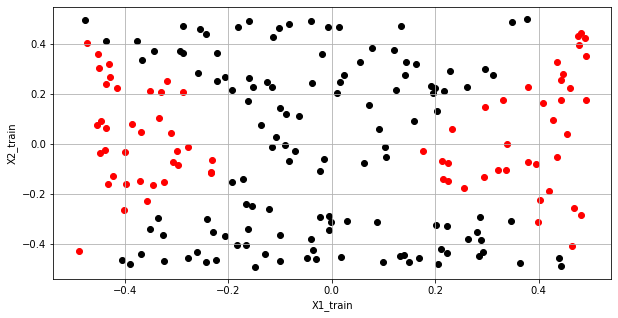

In [91]:

    plt.figure(figsize=(10,5))
    plt.scatter(df_train.X1_train[df_train.Y_train==1],df_train.X2_train[df_train.Y_train==1],c='r')
    plt.scatter(df_train.X1_train[df_train.Y_train==0],df_train.X2_train[df_train.Y_train==0],c='k')
    plt.xlabel('X1_train')
    plt.ylabel('X2_train')
    plt.grid()
        


Q2.Function LogisticRegression( ) can be used with argument C for regularization. C is
equal to the inverse of the shrinkage parameter α. Therefore α = 0 (no regularization) is accomplished
by using a large value of C, for instance C=1e20. Fit a logistic regression model (using predictors x1
and x2) with no regularization using LogisticRegression(solver=’lbfgs’,C=1e20) to the train
set and report the test accuracy rate.

In [92]:
model=LogisticRegression(solver='lbfgs',C=1e20,max_iter = 10000).fit(X_train,Y_train)

In [93]:
model.coef_

array([[0.38736343, 0.73714648]])

In [94]:
model.intercept_

array([-0.52967753])

In [95]:
yhat = model.predict(X_test)
model.score(X_test,Y_test)

0.63

Test accuracy rate is 63%.

Q3.Use X = PolynomialFeatures().fit_transform(X) to expand X with columns x1 sq, x2 sq and x1x2 as additional predictors (in addition to a column of ones). Report the top five rows of X.


In [96]:
X=PolynomialFeatures(degree=2).fit_transform(X)
X[:5,:]

array([[ 1.00000000e+00, -2.34491337e-01,  5.41770612e-02,
         5.49861871e-02, -1.27040515e-02,  2.93515396e-03],
       [ 1.00000000e+00, -1.27876100e-01,  1.88275238e-01,
         1.63522970e-02, -2.40759032e-02,  3.54475651e-02],
       [ 1.00000000e+00,  7.28533634e-02,  1.58057554e-01,
         5.30761255e-03,  1.15150244e-02,  2.49821903e-02],
       [ 1.00000000e+00,  4.08207790e-01,  1.63342725e-01,
         1.66633600e-01,  6.66777729e-02,  2.66808459e-02],
       [ 1.00000000e+00, -2.98318069e-01, -2.77657975e-02,
         8.89936703e-02,  8.28303908e-03,  7.70939508e-04]])

Q4.Use random_state = 0 to split the rows of this expanded dataset, into a train (40%)
and a test set. Build a logistic regression model with no regularization using C=1e20. Find the test
accuracy rate and the confusion matrix (cross tabulation table) for the test set. This matrix compares
the predictions with the true Y values.

In [97]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,y,test_size=0.6,stratify = y, random_state = 0)

In [98]:
model1=LogisticRegression(solver='lbfgs',C=1e20,max_iter = 10000).fit(X_train1,Y_train1)
yhat1 = model1.predict(X_test1)
model1.score(X_test1,Y_test1) #test accuracy rate

0.99

Test accuracy rate is 99%.

In [99]:
#confusion matrix
pd.crosstab(Y_test1,yhat1)

col_0,0,1
y,,
0,189,0
1,3,108


Q5.Use holdout cross validation to find the value of C that yields the largest test accuracy rate.
Report this value and the new test accuracy rate.

In [104]:
alphas = 10**np.linspace(-10,10,100)
c=1/alphas
c[:5]

array([1.00000000e+10, 6.28029144e+09, 3.94420606e+09, 2.47707636e+09,
       1.55567614e+09])

In [105]:
scores=[]
for i in c:
    model2=LogisticRegression(solver='lbfgs',C=i,max_iter = 10000).fit(X_train1,Y_train1)
    yhat2 = model2.predict(X_test1)
    scores.append(model2.score(X_test1,Y_test1))
print(len(scores))

100


In [106]:
max(scores)

0.9933333333333333

In [107]:
c[scores.index(max(scores))]


225701.97196339216

Max accuracy rate = 99.33% and corresponding C = 225701.97196339216